In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme(style="darkgrid")
random.seed(10)


In [ ]:
# assign xs randomly to distribution a or b based on a proportion bernoulli
# generate random Xs on uniform distribution
# assign random labels a or b
# for gaussian, X is uniform
# create 1000 x uniform data points, assign a coin flip (bernoulli) that determines which model it goes to
# we know there are 2 data generating processes, both have normally distributed error term
# one of the model assumptions is constant variance and mean 0

# in gaussian mixed model you don't start with x values, just the bernoulli

In [28]:
bernoulli = random.random()
x = np.random.uniform(0, 10, 1000)
label = np.random.binomial(1, bernoulli, 1000)

noise_a = np.random.normal(0, 1, 1000) 
noise_b = np.random.normal(0, 3, 1000)

d = {'x': x, 'label': label, 'noise_a': noise_a, 'noise_b': noise_b}
df = pd.DataFrame(data=d)

df.loc[df.label == 0, 'y'] = df.x * 3 + 2 + df.noise_a
df.loc[df.label == 1, 'y'] = df.x * 4 + 10 + df.noise_b

df

,x,label,noise_a,noise_b,y
0,6.834763,1,0.936435,1.228551,38.567604
1,1.405179,1,-1.364794,0.572586,16.193302
2,9.675568,0,-0.894383,3.389850,30.132320
3,1.512823,1,1.079731,-5.066699,10.984592
4,1.397890,0,-0.074846,-2.120512,6.118824
...,...,...,...,...,...
995,1.952590,1,-0.140841,2.302633,20.112992
996,7.614849,0,-1.622387,0.816339,23.222161
997,0.056552,1,2.096021,-4.279278,5.946929
998,4.977504,1,-0.398855,1.921721,31.831735


<AxesSubplot:xlabel='x', ylabel='y'>

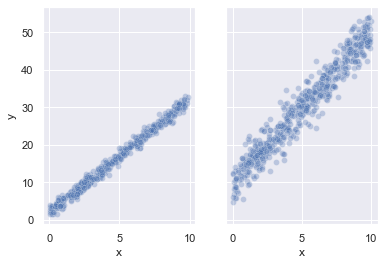

In [29]:
fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df[df.label == 0],x='x', y='y', alpha=0.3,ax=ax[0])
sns.scatterplot(data=df[df.label == 1],x='x', y='y', alpha=0.3,ax=ax[1])


<AxesSubplot:xlabel='x', ylabel='y'>

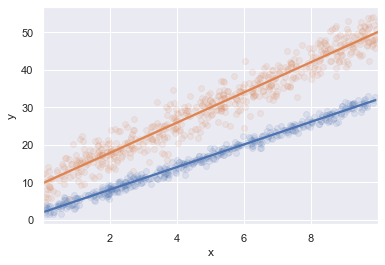

In [38]:
sns.regplot(data=df[df.label == 0],x='x', y='y',scatter_kws={'alpha':0.1})
sns.regplot(data=df[df.label == 1],x='x', y='y',scatter_kws={'alpha':0.1})
# you can see in plot below that they are different regressions


<AxesSubplot:xlabel='x', ylabel='Density'>

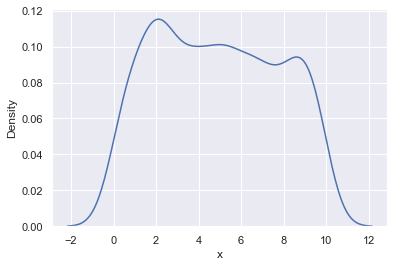

In [32]:
sns.kdeplot(data=df.x)

In [17]:
# from sklearn.mixture import GaussianMixture

# gmm = GaussianMixture(n_components=2)
# gmm.fit(df[['x']])

# mus = gmm.means_
# sigmas = gmm.covariances_

# print('mus: ',mus)
# print('sigmas: ',sigmas)
# #print(sigmas)

# #Fit the GMM with random data from the correspondent gaussians
# gaus_samples_1 = np.random.normal(mus[0][0], sigmas[0][0][0], 1000).reshape(1000,1)
# gaus_samples_2 = np.random.normal(mus[1][0], sigmas[1][0][0], 1000).reshape(1000,1)
# fit_samples = np.concatenate((gaus_samples_1, gaus_samples_2))
# y = gmm.predict(fit_samples)


mus:  [[-0.13487585]
 [ 0.05916498]]
sigmas:  [[[10.86539947]]

 [[ 1.550093  ]]]
